In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['font.family'] = 'Gulim'

import warnings
warnings.filterwarnings('ignore')

import datetime
today = str(datetime.datetime.now().date()).replace("-","")
print("오늘 날짜 : " + today)

오늘 날짜 : 20210701


In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


## 전처리
- 일자에서 월과 일을 분리
- 요일을 레이블 인코딩화(EDA로 요일의 중요도 순 파악)
- 월 별, 일 별 중식 석식 수요 차이 파악

In [5]:
train['월'] = pd.DatetimeIndex(train['일자']).month
test['월'] =pd.DatetimeIndex(test['일자']).month

train['일'] = pd.DatetimeIndex(train['일자']).day.astype(str)
test['일'] = pd.DatetimeIndex(test['일자']).day.astype(str)

In [6]:
month = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

train['월'] = train['월'].map(month)
test['월'] = test['월'].map(month)

In [7]:
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수']

In [8]:
train.head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,식사가능자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,Feb,1,2551.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,Feb,2,2551.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,Feb,3,2545.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,Feb,4,2497.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,Feb,5,2323.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,Feb,11,2218.0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0,Feb,12,2212.0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0,Feb,15,2514.0
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0,Feb,16,2529.0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0,Feb,17,2523.0


### train/test에서 중복 메뉴만 변수로서 사용

In [9]:
menu_train = train[['조식메뉴','중식메뉴','석식메뉴']]
menu_test = test[['조식메뉴','중식메뉴','석식메뉴']]
print(menu_train.shape)
print(menu_test.shape)

(1205, 3)
(50, 3)


In [10]:
def clean_split(df):
    df = df.split()
    for j in df:
        if '(' in j:
            del df[df.index(j)]    
    return df

In [11]:
menu_train['조식메뉴_prepro'] = menu_train['조식메뉴'].apply(clean_split)
menu_train['중식메뉴_prepro'] = menu_train['중식메뉴'].apply(clean_split)
menu_train['석식메뉴_prepro'] = menu_train['석식메뉴'].apply(clean_split)

menu_test['조식메뉴_prepro'] = menu_test['조식메뉴'].apply(clean_split)
menu_test['중식메뉴_prepro'] = menu_test['중식메뉴'].apply(clean_split)
menu_test['석식메뉴_prepro'] = menu_test['석식메뉴'].apply(clean_split)

In [12]:
lunch_train_f = [menu[:3] for menu in menu_train.중식메뉴_prepro]
lunch_test_f = [menu[:3] for menu in menu_test.중식메뉴_prepro]

dinner_train_f = [menu[:3] for menu in menu_train.석식메뉴_prepro]
dinner_test_f = [menu[:3] for menu in menu_test.석식메뉴_prepro]

## 벡터화

In [13]:
lunch_train_menu = pd.DataFrame(lunch_train_f, columns = ['밥', '국', '메인'])
lunch_test_menu = pd.DataFrame(lunch_test_f, columns = ['밥', '국', '메인'])

dinner_train_menu = pd.DataFrame(dinner_train_f, columns = ['밥', '국', '메인'])
dinner_test_f_menu = pd.DataFrame(dinner_test_f, columns = ['밥', '국', '메인'])

## 최종 데이터 셋 구축

In [14]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '월', '일',
       '식사가능자수'],
      dtype='object')

In [15]:
train_lunch_info = train[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수','월', '일', '식사가능자수']]
y_lunch = train[['중식계']]

train_dinner_info = train[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수','월', '일', '식사가능자수']]
y_dinner = train[['석식계']]

test_info = test[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수','월', '일', '식사가능자수']]

In [33]:
lunch_train = pd.concat([train_lunch_info, lunch_train_menu],axis=1)
lunch_test = pd.concat([test_info, lunch_test_menu],axis=1)

dinner_train = pd.concat([train_dinner_info, dinner_train_menu],axis=1)
dinner_test = pd.concat([test_info, dinner_test_f_menu],axis=1)

dinner_train = dinner_train.fillna('N')

dinner_train.isnull().sum()

# lunch_train = train_lunch_info
# lunch_test = test_info

# dinner_train = train_dinner_info
# dinner_test = test_info

요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
월                 0
일                 0
식사가능자수            0
밥                 0
국                 0
메인                0
dtype: int64

In [32]:
print(lunch_train.shape)
print(lunch_test.shape)

print(dinner_train.shape)
print(dinner_test.shape)

(1205, 12)
(50, 12)
(1205, 12)
(50, 12)


## 중식 예측모델

In [20]:
from catboost import CatBoostRegressor

In [21]:
cat_features = [f for f in lunch_train.columns if lunch_train[f].dtype == 'object']

def column_index(df, cat_features):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, cat_features, sorter=sidx)]

cat_features_idx = column_index(lunch_train, cat_features)    
print("Cat features are: %s" % [f for f in cat_features])
print(cat_features_idx)

Cat features are: ['요일', '월', '일']
[0 6 7]


### 테스트 데이터 예측

In [202]:
y_lunch = y_lunch.values
y_lunch = y_lunch.reshape(-1)

y_dinner = y_dinner.values
y_dinner = y_dinner.reshape(-1)

In [204]:
from sklearn.model_selection import KFold

n_fold = 10

kfold = KFold(n_splits=n_fold, shuffle=False)
# for each fold

lunch_models = [CatBoostRegressor(iterations = 3000, learning_rate = 0.04, loss_function='MAE') for _ in range(n_fold)]
lunch_preds = []
lunch_trues = []

for idx, (tr_idx, val_idx) in enumerate(kfold.split(lunch_train, y_lunch)):
    X_tr, X_val = lunch_train.iloc[tr_idx, :], lunch_train.iloc[val_idx, :]
    y_tr, y_val = y_lunch[tr_idx], y_lunch[val_idx]

    temp_model = lunch_models[idx]
    temp_model.fit(X_tr, y_tr,
                   eval_set=[(X_tr, y_tr), (X_val, y_val)],
                   early_stopping_rounds= 50,
                   cat_features=cat_features,
                   verbose=400)
    
    lunch_models[idx] = temp_model
    
    pred = temp_model.predict(X_val)
    true = y_val
    lunch_preds.extend(pred)
    lunch_trues.extend(true)

0:	learn: 166.4424714	test: 166.3340582	test1: 129.0697512	best: 129.0697512 (0)	total: 43.3ms	remaining: 2m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 60.06868801
bestIteration = 93

Shrink model to first 94 iterations.
0:	learn: 164.4878220	test: 164.3315489	test1: 149.4317346	best: 149.4317346 (0)	total: 28.4ms	remaining: 1m 25s
400:	learn: 45.4095747	test: 51.6571175	test1: 80.4814703	best: 80.3498006 (381)	total: 9.49s	remaining: 1m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 79.33435079
bestIteration = 573

Shrink model to first 574 iterations.
0:	learn: 164.1509216	test: 163.9786338	test1: 158.4528916	best: 158.4528916 (0)	total: 39ms	remaining: 1m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 59.99373731
bestIteration = 298

Shrink model to first 299 iterations.
0:	learn: 164.5053866	test: 164.3987814	test1: 149.1828090	best: 149.1828090 (0)	total: 39.7ms	remaining: 1m 58s
Stopped by overfitting detector

In [205]:
dinner_models = [CatBoostRegressor(iterations = 3000, learning_rate = 0.04, loss_function='MAE') for _ in range(n_fold)]
dinner_preds = []
dinner_trues = []

for idx, (tr_idx, val_idx) in enumerate(kfold.split(dinner_train, y_dinner)):
    X_tr, X_val = dinner_train.iloc[tr_idx, :], dinner_train.iloc[val_idx, :]
    y_tr, y_val = y_dinner[tr_idx], y_dinner[val_idx]

    temp_model = dinner_models[idx]
    temp_model.fit(X_tr, y_tr,
                   eval_set=[(X_tr, y_tr), (X_val, y_val)],
                   early_stopping_rounds= 50,
                   cat_features=cat_features,
                   verbose=400)
    
    dinner_models[idx] = temp_model
    
    pred = temp_model.predict(X_val)
    true = y_val
    dinner_preds.extend(pred)
    dinner_trues.extend(true)

0:	learn: 87.3110637	test: 87.2663869	test1: 70.9049563	best: 70.9049563 (0)	total: 29.3ms	remaining: 1m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 54.80334215
bestIteration = 268

Shrink model to first 269 iterations.
0:	learn: 86.2514439	test: 86.2325846	test1: 74.8417084	best: 74.8417084 (0)	total: 21.1ms	remaining: 1m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 56.77290993
bestIteration = 334

Shrink model to first 335 iterations.
0:	learn: 87.2465009	test: 87.2341055	test1: 65.6078623	best: 65.6078623 (0)	total: 53.5ms	remaining: 2m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 45.22554419
bestIteration = 285

Shrink model to first 286 iterations.
0:	learn: 86.3504173	test: 86.3808355	test1: 73.4875204	best: 73.4875204 (0)	total: 42.4ms	remaining: 2m 7s
400:	learn: 31.3906828	test: 36.8877658	test1: 53.7175874	best: 53.7175874 (400)	total: 10.4s	remaining: 1m 7s
Stopped by overfitting detector  (50 iterati

In [206]:
lunch = np.array([0]*50).astype(np.float64)
dinner = np.array([0]*50).astype(np.float64)

for model in lunch_models:
    lunch += model.predict(lunch_test)
    
for model in dinner_models:
    dinner += model.predict(dinner_test)

lunch /= n_fold
dinner /= n_fold

In [207]:
dinner_preds = np.array(dinner_preds)
dinner_trues = np.array(dinner_trues)
lunch_preds = np.array(lunch_preds)
lunch_trues = np.array(lunch_trues)

abs(dinner_preds - dinner_trues).mean() , abs(lunch_preds - lunch_trues).mean()

(53.80281300814912, 74.2643459755674)

In [208]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

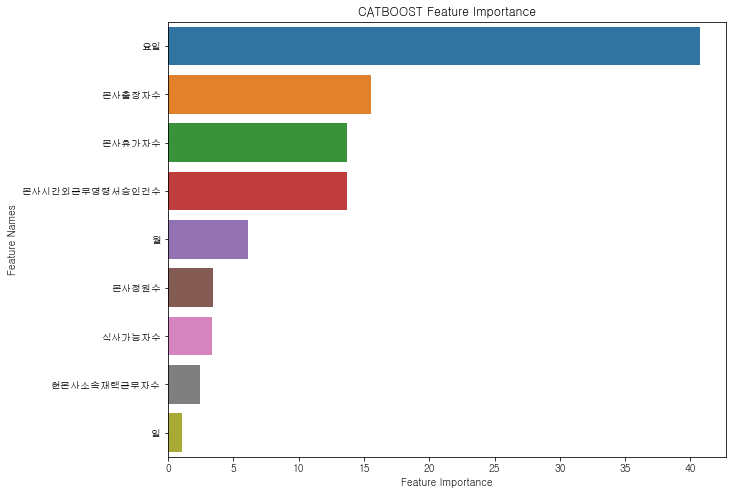

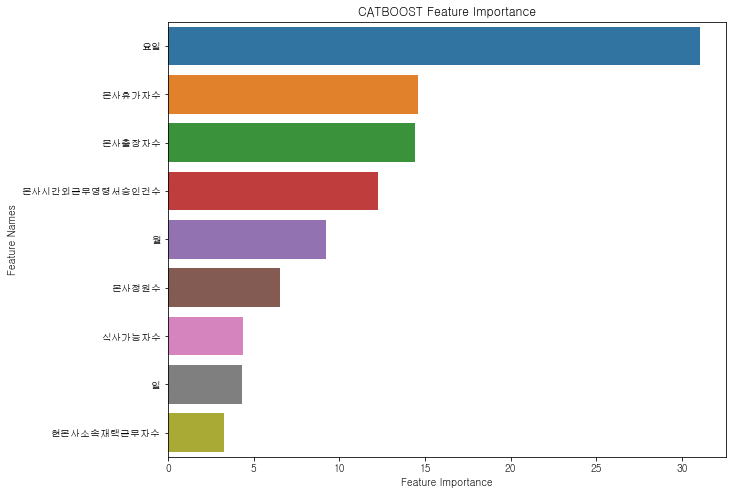

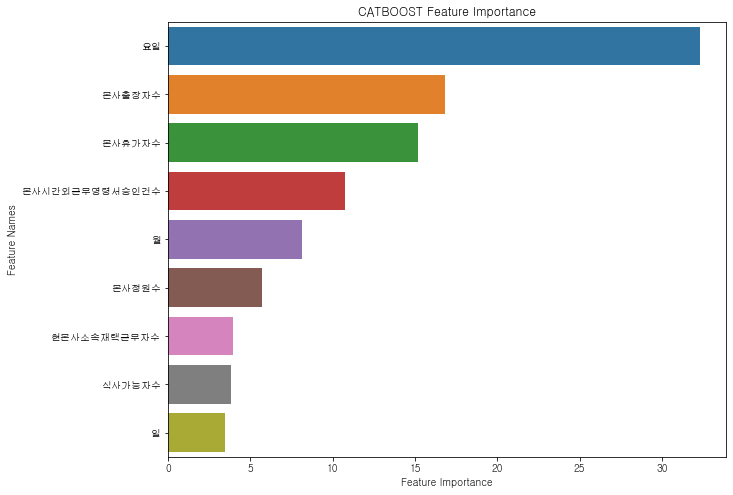

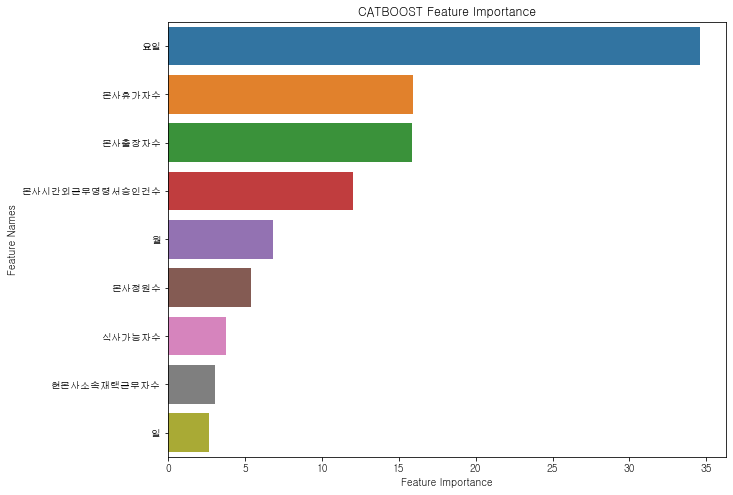

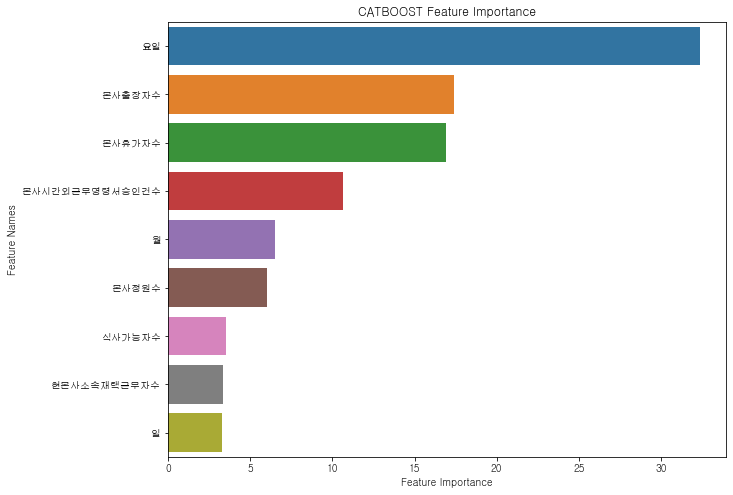

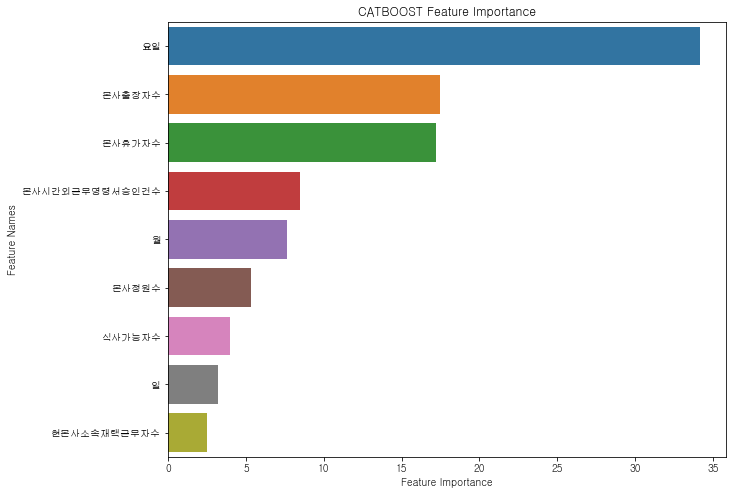

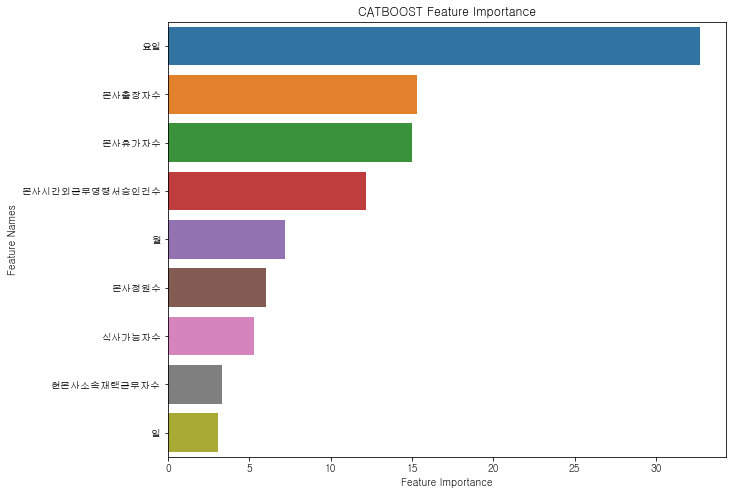

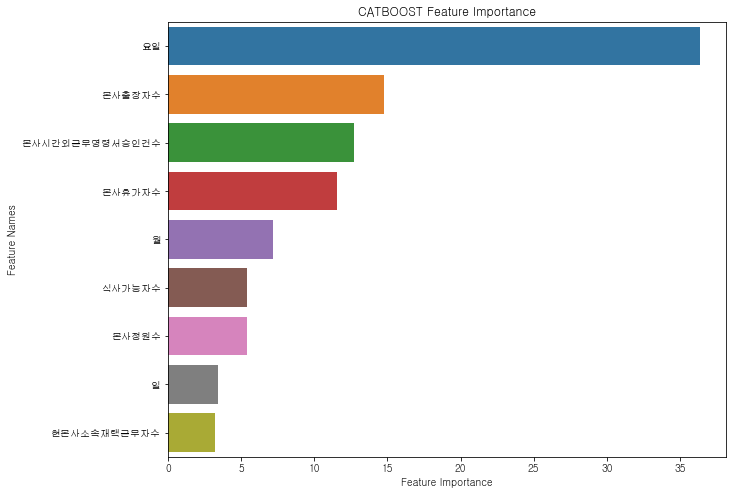

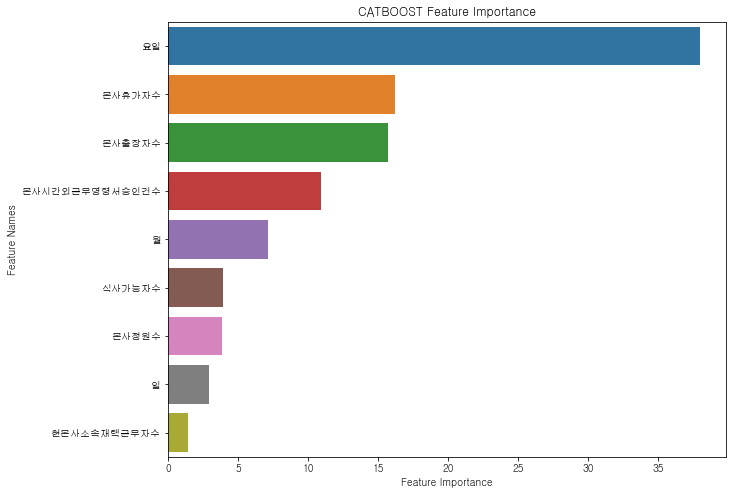

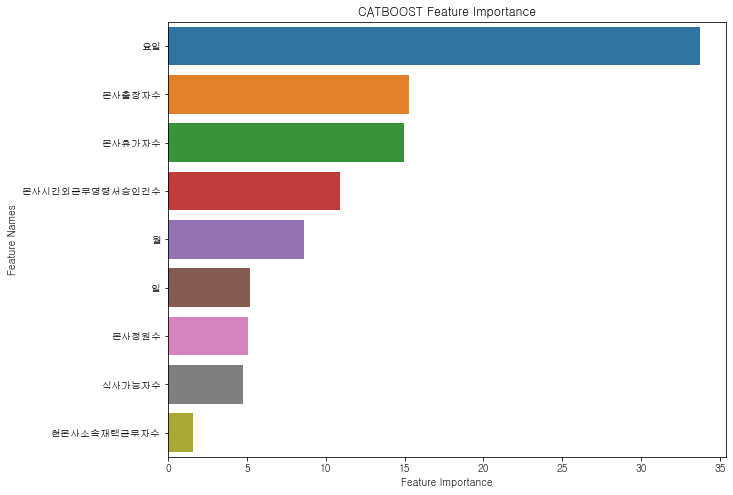

In [209]:
for idx in range(n_fold):
    plot_feature_importance(lunch_models[idx].get_feature_importance(),lunch_train.columns,'CATBOOST')

In [215]:
submission = pd.read_csv('../data/sample_submission.csv')
submission.iloc[:,1] = lunch
submission.iloc[:,2] = dinner

submission.head()

,일자,중식계,석식계
0,2021-01-27,987.415542,374.556283
1,2021-01-28,924.442194,432.716479
2,2021-01-29,638.729152,285.992864
3,2021-02-01,1208.938309,561.937476
4,2021-02-02,1005.407976,533.045803


In [216]:
answer = pd.read_csv('../submission/제출해야될것.csv')

In [217]:
lunch_answer = np.array(answer.iloc[:,1])
dinner_answer = np.array(answer.iloc[:,2])

In [218]:
abs(dinner - dinner_answer).mean()

32.219994182165735

In [219]:
submission.to_csv('../submission/'+today+'_cat_10fold.csv', index =False)